<a href="https://colab.research.google.com/github/arnoob16/GodlyBars/blob/master/DRAKE_RAP_generation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
data=pd.read_csv('/content/drive/My Drive/Data/songdata.csv')

# Word_based model using n-gram technique



In [ ]:
data.head()

,artist,song,link,text
0,ABBA,Ahe's My Kind Of Girl,/a/abba/ahes+my+kind+of+girl_20598417.html,"Look at her face, it's a wonderful face \nAnd..."
1,ABBA,"Andante, Andante",/a/abba/andante+andante_20002708.html,"Take it easy with me, please \nTouch me gentl..."
2,ABBA,As Good As New,/a/abba/as+good+as+new_20003033.html,I'll never know why I had to go \nWhy I had t...
3,ABBA,Bang,/a/abba/bang_20598415.html,Making somebody happy is a question of give an...
4,ABBA,Bang-A-Boomerang,/a/abba/bang+a+boomerang_20002668.html,Making somebody happy is a question of give an...


In [ ]:
len(data['artist'].unique())

643

In [ ]:
len(data[data['artist']=='Drake'])

117

In [ ]:
'Drake' in data['artist'].unique()

True

In [ ]:
df=data[data['artist']=='Drake']
song_data=list(df['text'])


In [ ]:
len(song_data)

117

In [ ]:
import nltk

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
from nltk.corpus import stopwords

stopwords=stopwords.words('english')

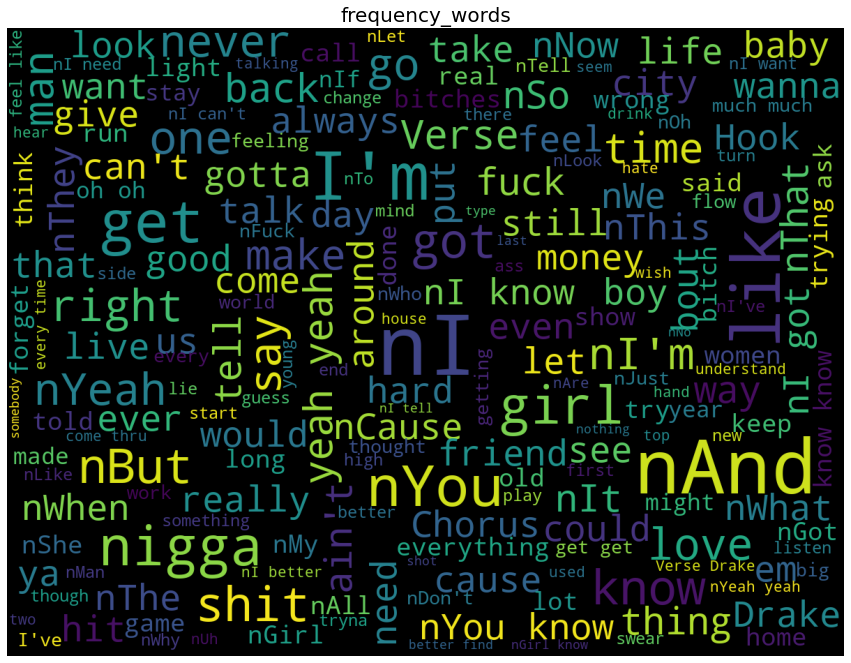

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


wordcloud=WordCloud(width=400,height=300,max_words = 200,
                     stopwords = stopwords,
                     background_color='black',max_font_size = 40,
                     scale = 3).generate(str(song_data))


fig = plt.figure(figsize=(15,15))
plt.axis('off')

fig.subplots_adjust(top = 2.25)
plt.imshow(wordcloud)
plt.title('frequency_words',size=20)
plt.show()



In [ ]:
song_data[:2]

["[Verse 1]  \nBoomin' out in South Gwinnett like Lou Will  \n6 man like Lou Will, 2 girls and they get along like I'm...  \nLike I'm Lou Will, I just got the new deal  \nI am in the Matrix and I just took the blue pill  \nNo ho shit, no fuckin' ho shit, just save that for your shit  \nI don't need no fuckin' body, I run my own shit  \nLike Soulja, I thought I told yah, you didn't listen  \nFieri, I'm in the kitchen, I'm a magician  \nI'm on it, I'm like Macgyver, I'm Michael Meyers  \nI kill careers and cut the lights off, this shit is frightenin'  \nI knew it would end up like this, I'm fuckin' psychic  \nYoung but I'm makin' millions to work the night shift  \n  \n[Hook]  \nWork the night shift  \nYoung but I'm makin' millions to work the night shift  \nWork, work the night shift  \n  \n[Verse 2]  \nYoung but I'm gettin' every single motherfuckin' thing  \nI'm old, you gotta know  \nI'm here to fuck with niggas souls, my heart is cold  \nIt's prolly cause I'm from the snow, with all

In [ ]:
song_data_arr=[song.split('\n') for song in song_data]

In [ ]:
song_data_arr[:2]

[['[Verse 1]  ',
  "Boomin' out in South Gwinnett like Lou Will  ",
  "6 man like Lou Will, 2 girls and they get along like I'm...  ",
  "Like I'm Lou Will, I just got the new deal  ",
  'I am in the Matrix and I just took the blue pill  ',
  "No ho shit, no fuckin' ho shit, just save that for your shit  ",
  "I don't need no fuckin' body, I run my own shit  ",
  "Like Soulja, I thought I told yah, you didn't listen  ",
  "Fieri, I'm in the kitchen, I'm a magician  ",
  "I'm on it, I'm like Macgyver, I'm Michael Meyers  ",
  "I kill careers and cut the lights off, this shit is frightenin'  ",
  "I knew it would end up like this, I'm fuckin' psychic  ",
  "Young but I'm makin' millions to work the night shift  ",
  '  ',
  '[Hook]  ',
  'Work the night shift  ',
  "Young but I'm makin' millions to work the night shift  ",
  'Work, work the night shift  ',
  '  ',
  '[Verse 2]  ',
  "Young but I'm gettin' every single motherfuckin' thing  ",
  "I'm old, you gotta know  ",
  "I'm here to 

In [ ]:
import re

def clean_text(text):
  x=re.sub('  ',' ',text)
  x=re.sub(r' $','',x)
  x=' '.join([i for i in text.split() if i not in stopwords])
  return x

In [ ]:
x_song_data=[[clean_text(text) for text in i if text != '']for i in song_data_arr]
x_song_data[:2]

[['[Verse 1]',
  "Boomin' South Gwinnett like Lou Will",
  "6 man like Lou Will, 2 girls get along like I'm...",
  "Like I'm Lou Will, I got new deal",
  'I Matrix I took blue pill',
  "No ho shit, fuckin' ho shit, save shit",
  "I need fuckin' body, I run shit",
  'Like Soulja, I thought I told yah, listen',
  "Fieri, I'm kitchen, I'm magician",
  "I'm it, I'm like Macgyver, I'm Michael Meyers",
  "I kill careers cut lights off, shit frightenin'",
  "I knew would end like this, I'm fuckin' psychic",
  "Young I'm makin' millions work night shift",
  '',
  '[Hook]',
  'Work night shift',
  "Young I'm makin' millions work night shift",
  'Work, work night shift',
  '',
  '[Verse 2]',
  "Young I'm gettin' every single motherfuckin' thing",
  "I'm old, gotta know",
  "I'm fuck niggas souls, heart cold",
  "It's prolly cause I'm snow, woes",
  "I know wanna see go, I'm roll",
  "I mean I'm back again, I'm",
  "You know truth, pretend, I'm friend",
  "Not guy, I'm buddy, show lovin'",
  'I m

In [ ]:
from collections import defaultdict

word_count=defaultdict(int)

for x_data in x_song_data:
  for line in x_data:
    for j in line.split():
       word_count[j]+=1

In [ ]:
len(word_count)

6944

In [ ]:
sorted(word_count,key=word_count.get,reverse=True)[:10]

['I', "I'm", 'And', 'know', 'like', 'You', 'get', 'got', 'shit', 'But']

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
tokenizer_1=Tokenizer()

In [ ]:
x_song_data=[i for x in x_song_data for i in x]

In [ ]:
new_song_data=[]
for i in x_song_data:
  if i not in new_song_data: 
    new_song_data.append(i)

In [ ]:
len(x_song_data),len(new_song_data)

(7805, 5419)

In [ ]:
tokenizer_1.fit_on_texts(new_song_data)
vocab=tokenizer_1.word_index


In [ ]:
input_sequences=[]
for line in new_song_data:
    token_list=tokenizer_1.texts_to_sequences([line])[0]
    for i in range(1,len(token_list)):
      tokens=token_list[:i+1]
      input_sequences.append(tokens)
      


In [ ]:
"""tokenizer.fit_on_texts([['Too late side','Caught chase', 'Twenty five life', 'Too late side', 'Caught chase'],['Twenty five life', 'Yeah', 'Too late', 'I cant keep chasing em']])
token_list=tokenizer.texts_to_sequences([['Too late side','Caught chase', 'Twenty five life', 'Too late side', 'Caught chase'],['Twenty five life', 'Yeah', 'Too late', 'I cant keep chasing em']])
token_list"""

"tokenizer.fit_on_texts([['Too late side','Caught chase', 'Twenty five life', 'Too late side', 'Caught chase'],['Twenty five life', 'Yeah', 'Too late', 'I cant keep chasing em']])\ntoken_list=tokenizer.texts_to_sequences([['Too late side','Caught chase', 'Twenty five life', 'Too late side', 'Caught chase'],['Twenty five life', 'Yeah', 'Too late', 'I cant keep chasing em']])\ntoken_list"

In [ ]:
len(input_sequences)

22778

In [ ]:
maxlen=max([len(x) for x in input_sequences])

In [ ]:
#padding
sequence=pad_sequences(input_sequences,maxlen=maxlen,padding='pre')
sequence[:2]

array([[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,  109,  304],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0, 2128,  576]], dtype=int32)

In [ ]:
x_data,labels=sequence[:,:-1],sequence[:,-1]

In [ ]:
len(vocab)

4734

In [ ]:
labels

array([ 304,  576, 2129, ...,  711,   14,  584], dtype=int32)

In [ ]:
from tensorflow.keras.utils import to_categorical
labels=to_categorical(labels,num_classes=len(vocab)+1)

In [ ]:
from tensorflow.keras.layers import Input,Dense,Dropout,LSTM,Embedding,Flatten,GlobalMaxPooling1D
from tensorflow.keras.models import Model

In [ ]:
x_data.shape,labels.shape

((22778, 15), (22778, 4735))

# Using transformer architecture 

In [ ]:
from tensorflow.keras import layers

In [ ]:
"""class MultiHeadSelfAttention(layers.Layer):
    def __init__(self, embed_dim, num_heads):
        super(MultiHeadSelfAttention, self).__init__()
        self.embed_dim = embed_dim
        self.num_heads = num_heads
        if embed_dim % num_heads != 0:
            raise ValueError(
                f"embedding dimension = {embed_dim} should be divisible by number of heads = {num_heads}"
            )
        self.projection_dim = embed_dim // num_heads
        self.query_dense = layers.Dense(embed_dim)
        self.key_dense = layers.Dense(embed_dim)
        self.value_dense = layers.Dense(embed_dim)
        self.combine_heads = layers.Dense(embed_dim)

    def attention(self, query, key, value):
        score = tf.matmul(query, key, transpose_b=True)
        dim_key = tf.cast(tf.shape(key)[-1], tf.float32)
        scaled_score = score / tf.math.sqrt(dim_key)
        weights = tf.nn.softmax(scaled_score, axis=-1)
        output = tf.matmul(weights, value)
        return output, weights

    def separate_heads(self, x, batch_size):
        x = tf.reshape(x, (batch_size, -1, self.num_heads, self.projection_dim))
        return tf.transpose(x, perm=[0, 2, 1, 3])

    def call(self, inputs):
        
        batch_size = tf.shape(inputs)[0]
        query = self.query_dense(inputs)  
        key = self.key_dense(inputs)  
        value = self.value_dense(inputs)  
        query = self.separate_heads(
            query, batch_size
        )  
        key = self.separate_heads(
            key, batch_size
        )  
        value = self.separate_heads(
            value, batch_size
        )  
        attention, weights = self.attention(query, key, value)
        attention = tf.transpose(
            attention, perm=[0, 2, 1, 3]
        )  
        concat_attention = tf.reshape(
            attention, (batch_size, -1, self.embed_dim)
        )  
        output = self.combine_heads(
            concat_attention
        )  
        return output"""

'class MultiHeadSelfAttention(layers.Layer):\n    def __init__(self, embed_dim, num_heads):\n        super(MultiHeadSelfAttention, self).__init__()\n        self.embed_dim = embed_dim\n        self.num_heads = num_heads\n        if embed_dim % num_heads != 0:\n            raise ValueError(\n                f"embedding dimension = {embed_dim} should be divisible by number of heads = {num_heads}"\n            )\n        self.projection_dim = embed_dim // num_heads\n        self.query_dense = layers.Dense(embed_dim)\n        self.key_dense = layers.Dense(embed_dim)\n        self.value_dense = layers.Dense(embed_dim)\n        self.combine_heads = layers.Dense(embed_dim)\n\n    def attention(self, query, key, value):\n        score = tf.matmul(query, key, transpose_b=True)\n        dim_key = tf.cast(tf.shape(key)[-1], tf.float32)\n        scaled_score = score / tf.math.sqrt(dim_key)\n        weights = tf.nn.softmax(scaled_score, axis=-1)\n        output = tf.matmul(weights, value)\n        

In [ ]:
"""class TransformerBlock(layers.Layer):
    def __init__(self, embed_dim, num_heads, ff_dim, rate=0.1):
        super(TransformerBlock, self).__init__()
        self.att = MultiHeadSelfAttention(embed_dim, num_heads)
        self.ffn = tf.keras.Sequential(
            [layers.Dense(ff_dim, activation="relu"), layers.Dense(embed_dim),]
        )
        self.layernorm1 = layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = layers.LayerNormalization(epsilon=1e-6)
        self.dropout1 = layers.Dropout(rate)
        self.dropout2 = layers.Dropout(rate)

    def call(self, inputs, training):
        attn_output = self.att(inputs)
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(inputs + attn_output)
        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output, training=training)
        return self.layernorm2(out1 + ffn_output)"""

'class TransformerBlock(layers.Layer):\n    def __init__(self, embed_dim, num_heads, ff_dim, rate=0.1):\n        super(TransformerBlock, self).__init__()\n        self.att = MultiHeadSelfAttention(embed_dim, num_heads)\n        self.ffn = tf.keras.Sequential(\n            [layers.Dense(ff_dim, activation="relu"), layers.Dense(embed_dim),]\n        )\n        self.layernorm1 = layers.LayerNormalization(epsilon=1e-6)\n        self.layernorm2 = layers.LayerNormalization(epsilon=1e-6)\n        self.dropout1 = layers.Dropout(rate)\n        self.dropout2 = layers.Dropout(rate)\n\n    def call(self, inputs, training):\n        attn_output = self.att(inputs)\n        attn_output = self.dropout1(attn_output, training=training)\n        out1 = self.layernorm1(inputs + attn_output)\n        ffn_output = self.ffn(out1)\n        ffn_output = self.dropout2(ffn_output, training=training)\n        return self.layernorm2(out1 + ffn_output)'

In [ ]:
#model development
#num_heads=4
embedding_dim=100
i=Input(shape=(x_data.shape[1],))
x=Embedding(len(vocab)+1,embedding_dim)(i)
#x=TransformerBlock(embedding_dim, num_heads,512)(x)
x=LSTM(512,return_sequences=True)(x)
x=Dropout(0.2)(x)
x=Dense(256,activation='relu')(x)
x=GlobalMaxPooling1D()(x)
x=Dense(len(vocab)+1,activation='softmax')(x)

Drake_model=Model(i,x)
Drake_model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
Drake_model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 15)]              0         
_________________________________________________________________
embedding (Embedding)        (None, 15, 100)           473500    
_________________________________________________________________
lstm (LSTM)                  (None, 15, 512)           1255424   
_________________________________________________________________
dropout (Dropout)            (None, 15, 512)           0         
_________________________________________________________________
dense (Dense)                (None, 15, 256)           131328    
_________________________________________________________________
global_max_pooling1d (Global (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 4735)             

In [ ]:
!pip install h5py pyyaml

In [ ]:
labels[18].argmax(axis=-1)

388

# Training

In [ ]:
checkpoint_filepath='/content/DrakeRAPGmodel.h5'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='accuracy',
    mode='max',
    save_best_only=True)

r=Drake_model.fit(x_data,labels,epochs=35,callbacks=[model_checkpoint_callback])

Epoch 1/35
712/712 [==============================] - 169s 238ms/step - loss: 7.2707 - accuracy: 0.0553
Epoch 2/35
712/712 [==============================] - 178s 250ms/step - loss: 7.0165 - accuracy: 0.0555
Epoch 3/35
712/712 [==============================] - 179s 251ms/step - loss: 6.9594 - accuracy: 0.0555
Epoch 4/35
712/712 [==============================] - 174s 244ms/step - loss: 6.9217 - accuracy: 0.0555
Epoch 5/35
712/712 [==============================] - 175s 245ms/step - loss: 6.8781 - accuracy: 0.0557
Epoch 6/35
712/712 [==============================] - 174s 244ms/step - loss: 6.8055 - accuracy: 0.0569
Epoch 7/35
712/712 [==============================] - 179s 251ms/step - loss: 6.6657 - accuracy: 0.0587
Epoch 8/35
712/712 [==============================] - 172s 242ms/step - loss: 6.4901 - accuracy: 0.0642
Epoch 9/35
712/712 [==============================] - 174s 244ms/step - loss: 6.2926 - accuracy: 0.0677
Epoch 10/35
712/712 [==============================] - 175s 246m

# Predictions

In [ ]:
import pickle
def save_obj(obj, name ):
    with open('/content/'+ name + '.pkl', 'wb') as f:
         pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

In [ ]:
save_obj(tokenizer_1,'Drake_tokenizer')

In [ ]:
import pickle
with open('/content/Drake_tokenizer.pkl', 'rb') as f:
    drake_tokenizer=pickle.load(f)

In [ ]:
len(drake_tokenizer.word_index)

4734

In [ ]:
new_song_data[:100]

['[Verse 1]',
 "Boomin' South Gwinnett like Lou Will",
 "6 man like Lou Will, 2 girls get along like I'm...",
 "Like I'm Lou Will, I got new deal",
 'I Matrix I took blue pill',
 "No ho shit, fuckin' ho shit, save shit",
 "I need fuckin' body, I run shit",
 'Like Soulja, I thought I told yah, listen',
 "Fieri, I'm kitchen, I'm magician",
 "I'm it, I'm like Macgyver, I'm Michael Meyers",
 "I kill careers cut lights off, shit frightenin'",
 "I knew would end like this, I'm fuckin' psychic",
 "Young I'm makin' millions work night shift",
 '',
 '[Hook]',
 'Work night shift',
 'Work, work night shift',
 '[Verse 2]',
 "Young I'm gettin' every single motherfuckin' thing",
 "I'm old, gotta know",
 "I'm fuck niggas souls, heart cold",
 "It's prolly cause I'm snow, woes",
 "I know wanna see go, I'm roll",
 "I mean I'm back again, I'm",
 "You know truth, pretend, I'm friend",
 "Not guy, I'm buddy, show lovin'",
 'I might go DeMarcus Cousins public',
 "I fuckin' tape CNN",
 'I tryna win awards, sh

In [ ]:
#predictions
seed_text = "This get confused"
next_words = 70


for _ in range(next_words):
	token_list = tokenizer_1.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=x_data.shape[1], padding='pre')
	predicted = Drake_model.predict(token_list, verbose=0).argmax(axis=-1)
	output_word = ""
	for word, index in tokenizer_1.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

This get confused something man i heard see years side million lot tuh tuh ya shit i know know shit let 'em go go i like baby baby like like i know i know know know right i know i'm know i'm go know it would know i know i know i know it know i i know know like i know get it get it big it get like i i know
